Loading data...

Training model...

Starting training with:
Initial learning rate: 0.006
Convergence tolerance: 1e-06
Max iterations: 1000

Converged after 13 iterations!
Final training cost: 0.418327
Final weight change: 5.703255530611559e-07

Final Results:
Number of iterations: 13
Final weights: [-6.66849652e-05  1.50591670e-03 -1.90277643e-03 -2.34801774e-03
  4.72134287e-03 -6.13752823e-04 -7.35459033e-04  5.54122272e-04]
Final training cost: 0.418327

Iteration Details:

 Iteration  Training Cost  Max Weight Change  Learning Rate  Gradient Norm
         1       0.421229       2.373925e-03       0.006000       0.495656
         2       0.419762       1.177418e-03       0.003000       0.491018
         3       0.419040       5.863509e-04       0.001500       0.488734
         4       0.418683       2.925894e-04       0.000750       0.487600
         5       0.418504       1.461486e-04       0.000375       0.487035
         6       0.418415       7.303782e-05       0.000188       0.

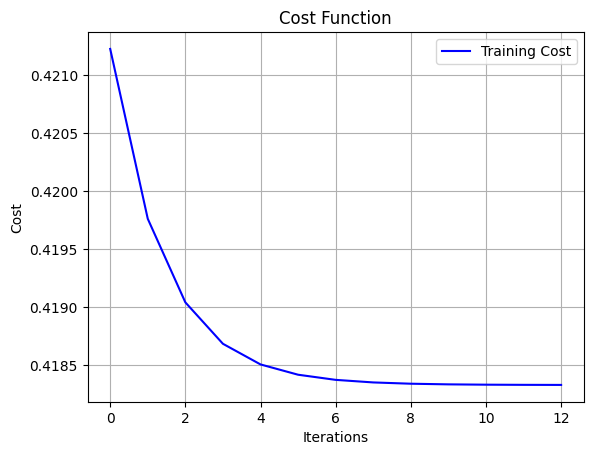


Test cost: 0.579167


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# This function allows us to lad and prepare the data.
def load_and_prepare_data(filename):
    data = pd.read_csv(filename, header=None)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_with_bias = np.column_stack(([1] * X.shape[0], X))
    return X_with_bias, np.array(y)
# Function to caculateb the gradient
def compute_gradient(X, y, weights):
    m = len(y)
    predictions = np.matmul(X, weights)
    error = predictions - y
    gradient = (1/m) * np.matmul(X.T, error)
    return gradient
# Function Compute the cost
def compute_cost(X, y, weights):
    m = len(y)
    predictions = np.matmul(X, weights)
    return (1/(2*m)) * np.sum((predictions - y)**2)
# Train our Regression Model
def train_lms_regression(X, y, learning_rate=0.006, max_iterations=1000, tolerance=1e-6):
    m, n = X.shape
    weights = np.zeros(n)
    training_costs = []  # Track training costs
    iteration_data = []  # This list will be used to store iteration details
    r = learning_rate

    print("\nStarting training with:")
    print(f"Initial learning rate: {learning_rate}")
    print(f"Convergence tolerance: {tolerance}")
    print(f"Max iterations: {max_iterations}\n")

    for iteration in range(max_iterations):
        # Will be used to calculate predictions and current training cost
        predictions = np.matmul(X, weights)
        current_cost = (1/(2*m)) * np.sum((predictions - y)**2)
        training_costs.append(current_cost)

        # Compute gradient and update weights
        gradient = compute_gradient(X, y, weights)
        weights_new = weights - r * gradient

        # Calculate weight change
        weight_change = np.max(np.abs(weights_new - weights))

        # Store the iteration details
        iteration_data.append([iteration + 1, current_cost, weight_change, r, np.linalg.norm(gradient)])

        # Check for convergence
        if weight_change < tolerance:
            print(f"Converged after {iteration + 1} iterations!")
            print(f"Final training cost: {current_cost:.6f}")
            print(f"Final weight change: {weight_change}")
            break

        # Update weights and learning rate
        weights = weights_new
        r = r / 2

    return weights, training_costs, iteration_data, iteration + 1

def plot_training_cost(training_costs):
    plt.plot(range(len(training_costs)), training_costs, 'b-', label='Training Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.grid(True)
    plt.legend()
    plt.show()

def display_iteration_table(iteration_data):
    # Using this to Convert iteration data to a DataFrame for better visualization
    iteration_df = pd.DataFrame(iteration_data, columns=['Iteration', 'Training Cost', 'Max Weight Change', 'Learning Rate', 'Gradient Norm'])
    print("\nIteration Details:\n")
    print(iteration_df.to_string(index=False))  # Table Display
def main():
    # Now we will start to Load and prepare data
    print("Loading data...")
    X_train, y_train = load_and_prepare_data("concrete/train.csv")
    X_test, y_test = load_and_prepare_data("concrete/test.csv")

    print("\nTraining model...")
    weights, training_costs, iteration_data, iterations = train_lms_regression(X_train, y_train)

    # Print final results
    print("\nFinal Results:")
    print(f"Number of iterations: {iterations}")
    print(f"Final weights: {weights}")
    print(f"Final training cost: {training_costs[-1]:.6f}")

    # Let's put the data in a table
    display_iteration_table(iteration_data)

    # Plot training cost for better visualization
    plot_training_cost(training_costs)

    # Calculate and print test error
    test_cost = compute_cost(X_test, y_test, weights)
    print(f"\nTest cost: {test_cost:.6f}")

if __name__ == "__main__":
    main()